In [ ]:
from google.colab import drive
import os

drive.mount("/content/drive")
os.chdir("drive/MyDrive/traffic-forecasting-GNN")

Mounted at /content/drive


In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.3 MB/s eta 0:00:00


In [ ]:
import torch
import utils

In [ ]:
# regresion lineal para los resultados de cada sensor

In [ ]:
X_train_gat_lstm = torch.load("trained_models/gat_lstm_outputs_train.pt", map_location=torch.device('cpu'))
X_train_gat_gru = torch.load("trained_models/gat_gru_outputs_train.pt", map_location=torch.device('cpu'))
X_train_gcn_lstm = torch.load("trained_models/gcn_lstm_outputs_train.pt", map_location=torch.device('cpu'))
X_train_gcn_gru = torch.load("trained_models/gcn_gru_outputs_train.pt", map_location=torch.device('cpu'))

In [ ]:
X_test_gat_lstm = torch.load("trained_models/gat_lstm_outputs.pt", map_location=torch.device('cpu'))
X_test_gat_gru = torch.load("trained_models/gat_gru_outputs.pt", map_location=torch.device('cpu'))
X_test_gcn_lstm = torch.load("trained_models/gcn_lstm_outputs.pt", map_location=torch.device('cpu'))
X_test_gcn_gru = torch.load("trained_models/gcn_gru_outputs.pt", map_location=torch.device('cpu'))

In [ ]:
train_loader, test_loader, train_loader_full, test_loader_full, adj, mean, std = utils.get_data_loaders()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

_, Y_test = next(iter(test_loader_full))

valores_reales = []
with torch.no_grad():
  for X_batch, Y_batch in train_loader_full:
    X_batch , Y_batch = X_batch.to(device), Y_batch.to(device)
    valores_reales.append(Y_batch)

Y_train = torch.cat(valores_reales, dim=0)

In [ ]:
X_train = torch.cat((X_train_gat_lstm, X_train_gat_gru, X_train_gcn_lstm, X_train_gcn_gru), dim=2)
X_test = torch.cat((X_test_gat_lstm, X_test_gat_gru, X_test_gcn_lstm, X_test_gcn_gru), dim=2)

In [ ]:
print(X_test.shape)
print(X_train.shape)

torch.Size([6852, 207, 4])
torch.Size([27408, 207, 4])


In [ ]:
print(Y_test.shape)
print(Y_train.shape)

torch.Size([6852, 207, 1])
torch.Size([27408, 207, 1])


In [ ]:
X_train = X_train.reshape(-1, 4)
X_test = X_test.reshape(-1, 4)
Y_train = Y_train.reshape(-1)
Y_test = Y_test.reshape(-1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

torch.Size([5673456, 4])
torch.Size([1418364, 4])
torch.Size([5673456])
torch.Size([1418364])


In [ ]:
_, Y_test = next(iter(test_loader_full))
Y_test = Y_test.to(device)

In [ ]:
import statsmodels.api as sm
import numpy as np

# Añadir una constante (intercepto) a los datos de entrada
X_train = sm.add_constant(X_train.cpu())

# Ajustar el modelo
model = sm.OLS(np.array(Y_train.cpu()), np.array(X_train)).fit()

# Obtener el resumen del modelo
print(model.summary()) # las variables se encuentran en este orden: GAT-LSTM, GAT-GRU, GCN-LSTM, GCN-GRU

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.209e+07
Date:                Fri, 12 Jul 2024   Prob (F-statistic):               0.00
Time:                        03:25:32   Log-Likelihood:            -1.4575e+06
No. Observations:             5673456   AIC:                         2.915e+06
Df Residuals:                 5673451   BIC:                         2.915e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0056      0.000     41.963      0.0

In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
predic = model.predict(X_test)

In [ ]:
predic = torch.tensor(predic.reshape(-1, 207, 1)).to(device)

In [ ]:
torch.save(predic, "trained_models_stacking/outputs_stacking_regr.pt")

In [ ]:
torch.mean(torch.square(predic - Y_test))

tensor(0.1912, dtype=torch.float64)

In [ ]:
model.params

array([0.00555096, 0.05397074, 0.37929581, 0.40353256, 0.17083422])

In [ ]:
# red neuronal sobre los 4 grafos predichos

In [ ]:
X_train_gat_lstm = torch.load("trained_models/gat_lstm_outputs_train.pt", map_location=torch.device('cpu'))
X_train_gat_gru = torch.load("trained_models/gat_gru_outputs_train.pt", map_location=torch.device('cpu'))
X_train_gcn_lstm = torch.load("trained_models/gcn_lstm_outputs_train.pt", map_location=torch.device('cpu'))
X_train_gcn_gru = torch.load("trained_models/gcn_gru_outputs_train.pt", map_location=torch.device('cpu'))

X_test_gat_lstm = torch.load("trained_models/gat_lstm_outputs.pt", map_location=torch.device('cpu'))
X_test_gat_gru = torch.load("trained_models/gat_gru_outputs.pt", map_location=torch.device('cpu'))
X_test_gcn_lstm = torch.load("trained_models/gcn_lstm_outputs.pt", map_location=torch.device('cpu'))
X_test_gcn_gru = torch.load("trained_models/gcn_gru_outputs.pt", map_location=torch.device('cpu'))

In [ ]:
train_loader, test_loader, train_loader_full, test_loader_full, adj, mean, std = utils.get_data_loaders()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

_, Y_test = next(iter(test_loader_full))

valores_reales = []
with torch.no_grad():
  for X_batch, Y_batch in train_loader_full:
    X_batch , Y_batch = X_batch.to(device), Y_batch.to(device)
    valores_reales.append(Y_batch)

Y_train = torch.cat(valores_reales, dim=0)

In [ ]:
X_train = torch.cat((X_train_gat_lstm, X_train_gat_gru, X_train_gcn_lstm, X_train_gcn_gru), dim=2)
X_test = torch.cat((X_test_gat_lstm, X_test_gat_gru, X_test_gcn_lstm, X_test_gcn_gru), dim=2)

In [ ]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("Y_train: ", Y_train.shape)
print("Y_test: ", Y_test.shape)

X_train:  torch.Size([27408, 207, 4])
X_test:  torch.Size([6852, 207, 4])
Y_train:  torch.Size([27408, 207, 1])
Y_test:  torch.Size([6852, 207, 1])


In [ ]:
# Concatenar las predicciones de los modelos para obtener el input de la red neuronal
X_train = X_train.view(-1, 207 * 4)
X_test = X_test.view(-1, 207 * 4)
Y_train = Y_train.view(-1, 207)
Y_test = Y_test.view(-1, 207)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("Y_train: ", Y_train.shape)
print("Y_test: ", Y_test.shape)

X_train:  torch.Size([27408, 828])
X_test:  torch.Size([6852, 828])
Y_train:  torch.Size([27408, 207])
Y_test:  torch.Size([6852, 207])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Definir la red neuronal de 2 capas
class EnsembleNN(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super(EnsembleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size_2, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)

        out = self.fc2(out)
        out = self.relu2(out)

        out = self.fc3(out)
        return out

In [ ]:
# Parámetros del modelo
input_size = 207 * 4            # 207 variables * 4 modelos
hidden_size = 207 * 3           # tamano primera capa oculta
hidden_size_2 = 207 * 2         # tamano segunda capa oculta
output_size = 207               # 207 variables de salida

In [ ]:
# Crear el modelo, el criterio de pérdida y el optimizador
model = EnsembleNN(input_size, hidden_size, hidden_size_2, output_size)
model = model.to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
# Crear DataLoader para el entrenamiento
train_dataset = TensorDataset(X_train, Y_train)
test_dataset = TensorDataset(X_test, Y_test)
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=X_test.shape[0], shuffle=False)

In [ ]:
# Entrenar la red neuronal
num_epochs = 40

lossi = []
lossi_test = []
i = 0
xs = [0]

with torch.no_grad():
    model.eval()
    X_batch, Y_batch = next(iter(test_loader))
    X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
    outputs = model(X_batch)
    loss_test = criterion(outputs, Y_batch)
    lossi_test.append(loss_test.item())

for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        # Adelante
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        lossi.append(loss.item())

        # Atrás
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        i += 1
    xs.append(i)
    model.eval()
    with torch.no_grad():
        X_batch, Y_batch = next(iter(test_loader))
        X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
        outputs = model(X_batch)
        loss_test = criterion(outputs, Y_batch)
        lossi_test.append(loss_test.item())
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Loss test: {lossi_test[-1]:.4f}')

    if lossi_test[-2] < lossi_test[-1]:
      print("Early stopping!!!")
      break

Epoch [1/40], Loss: 0.2968, Loss test: 0.3594
Epoch [2/40], Loss: 0.1892, Loss test: 0.3011
Epoch [3/40], Loss: 0.2122, Loss test: 0.2728
Epoch [4/40], Loss: 0.1871, Loss test: 0.2540
Epoch [5/40], Loss: 0.1117, Loss test: 0.2431
Epoch [6/40], Loss: 0.1049, Loss test: 0.2361
Epoch [7/40], Loss: 0.1320, Loss test: 0.2309
Epoch [8/40], Loss: 0.0882, Loss test: 0.2211
Epoch [9/40], Loss: 0.0995, Loss test: 0.2169
Epoch [10/40], Loss: 0.0891, Loss test: 0.2130
Epoch [11/40], Loss: 0.0981, Loss test: 0.2104
Epoch [12/40], Loss: 0.0857, Loss test: 0.2076
Epoch [13/40], Loss: 0.1181, Loss test: 0.2068
Epoch [14/40], Loss: 0.1160, Loss test: 0.2043
Epoch [15/40], Loss: 0.1606, Loss test: 0.2025
Epoch [16/40], Loss: 0.1165, Loss test: 0.2026
Early stopping!!!


In [ ]:
outputs = outputs.unsqueeze(dim=2)
torch.save(outputs, "trained_models_stacking/outputs_stacking_nn.pt")

In [ ]:
import matplotlib.pyplot as plt

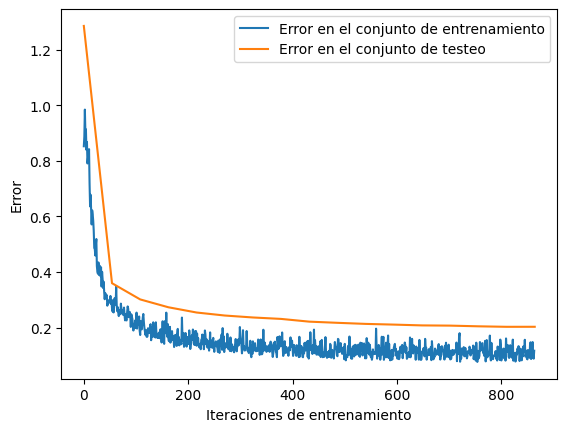

In [ ]:
plt.plot(lossi, label="Error en el conjunto de entrenamiento")
plt.plot(xs, lossi_test, label="Error en el conjunto de testeo")
plt.xlabel("Iteraciones de entrenamiento")
plt.ylabel("Error")
plt.legend()
plt.show()
# evolucion del error en la red neuronal que hace el stacking